### Fractals

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Naive Implementation

In [3]:
def generateFractal_Naive(nx=1024, ny=1024, N=100, z_max=4, plotBool=False):

    start = time.time()
    
    x_min = -2
    x_max = 0.5
    y_min = -1.25
    y_max = 1.25
    
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    nrows, ncols = C.shape
    Z = np.zeros_like(X)
    z0 = np.zeros_like(X)
    z = z0 + 0j
    keep = np.full(X.shape, True)

    for idx in range(nrows):
        for jdx in range(ncols):
            z = 0 + 0j
            for n in range(N):
                z = z ** 2 + C[idx, jdx]
                if abs(z) > z_max:
                    Z[idx, jdx] = n
                    break
                    
    dt = time.time() - start
    print("Mandelbrot Set created in {} s".format(dt))
        
    if plotBool:
        plt.figure(figsize=(10,10))
        plt.imshow(Z, cmap = 'gnuplot2')

        plt.xticks(np.linspace(0, nx, 5), np.linspace(x_min, x_max, 5));
        plt.yticks(np.linspace(0, ny, 5), np.linspace(y_min, y_max, 5));

    return X, Y, Z

Mandelbrot Set created in 94.35320115089417 s


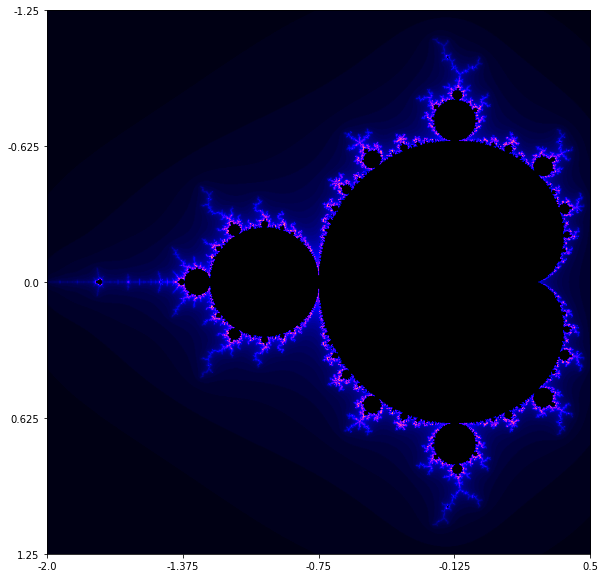

In [4]:
X, Y, fractalSet = generateFractal_Naive(plotBool=True)

### Profiling

In [5]:
%load_ext line_profiler

In [6]:
%lprun -f generateFractal_Naive X, Y, fractalSet = generateFractal_Naive()

Mandelbrot Set created in 716.9165091514587 s


### Using Numba

In [7]:
from numba import jit

@jit
def generateFractal_Numba(nx=1024, ny=1024, N=100, z_max=4):
    
    x_min = -2
    x_max = 0.5
    y_min = -1.25
    y_max = 1.25
    
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)

    Z = np.zeros((nx, ny))

    for idx in range(nx):
        for jdx in range(ny):
            z = 0 + 0j
            for n in range(N):
                z = z ** 2 + x[idx] + 1j*y[jdx]
                if abs(z) > z_max:
                    Z[idx, jdx] = n
                    break
                    
    return X, Y, Z

In [9]:
start = time.time()
X, Y, fractalSet = generateFractal_Numba()
dt = time.time() - start
print("Mandelbrot Set created in {} s".format(dt))

Mandelbrot Set created in 2.4558773040771484 s


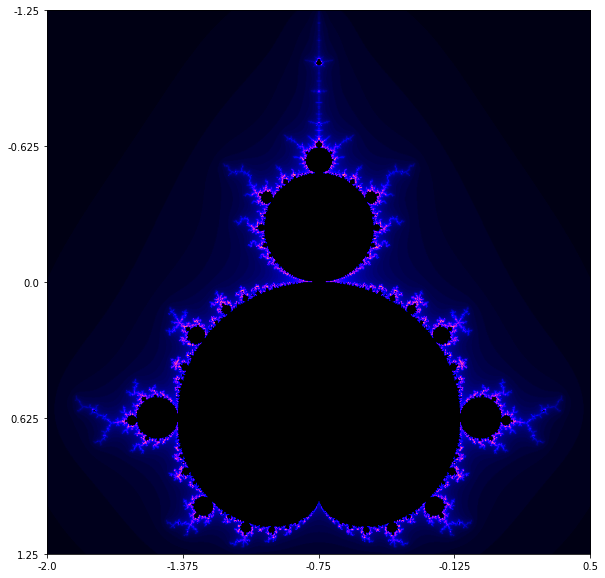

In [11]:
x_min = -2
x_max = 0.5
y_min = -1.25
y_max = 1.25
nx=1024
ny=1024
plt.figure(figsize=(10,10))
plt.imshow(fractalSet, cmap = 'gnuplot2')

plt.xticks(np.linspace(0, nx, 5), np.linspace(x_min, x_max, 5));
plt.yticks(np.linspace(0, ny, 5), np.linspace(y_min, y_max, 5));

### Vectorization

In [12]:
def generateFractal_Vect(nx=1024, ny=1024, N=100, z_max=4, plotBool=False):
    
    start = time.time()
    
    x_min = -2
    x_max = 0.5
    y_min = -1.25
    y_max = 1.25
    
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    nrows, ncols = C.shape
    Z = np.zeros_like(X)
    z0 = np.zeros_like(X)
    z = z0 + 0j
    keep = np.full(X.shape, True)
    
    for n in range(N):
        z = z ** 2 + C
        mask = (abs(z) > z_max) & keep
        Z[mask] = n
        keep[mask] = False
        
    dt = time.time() - start
    print("Mandelbrot Set created in {} s".format(dt))
        
    if plotBool:
        plt.figure(figsize=(10,10))
        plt.imshow(Z, cmap = 'gnuplot2')

        plt.xticks(np.linspace(0, nx, 5), np.linspace(x_min, x_max, 5));
        plt.yticks(np.linspace(0, ny, 5), np.linspace(y_min, y_max, 5));

    return X, Y, Z

<ipython-input-12-7aeccb32d261>:22: RuntimeWarning: overflow encountered in square
  z = z ** 2 + C
<ipython-input-12-7aeccb32d261>:22: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + C
<ipython-input-12-7aeccb32d261>:23: RuntimeWarning: overflow encountered in absolute
  mask = (abs(z) > z_max) & keep


Mandelbrot Set created in 5.571733713150024 s


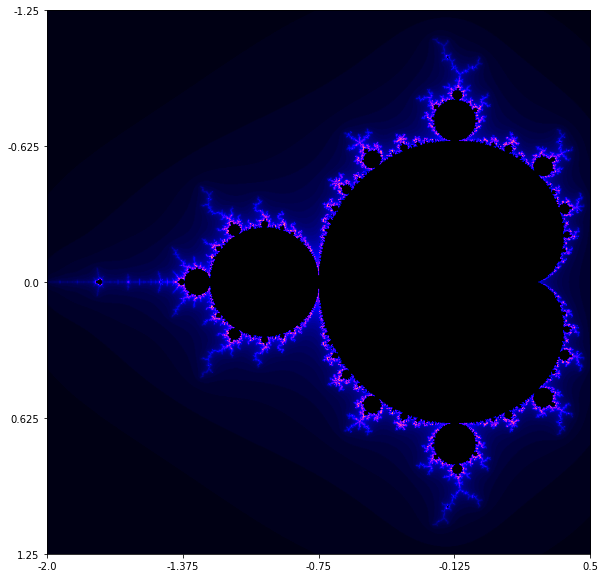

In [13]:
X, Y, fractalSet = generateFractal_Vect(plotBool=True)

In [14]:
%lprun -f generateFractal_Vect X, Y, fractalSet = generateFractal_Vect()

<ipython-input-12-7aeccb32d261>:22: RuntimeWarning: overflow encountered in square
  z = z ** 2 + C
<ipython-input-12-7aeccb32d261>:22: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + C
<ipython-input-12-7aeccb32d261>:23: RuntimeWarning: overflow encountered in absolute
  mask = (abs(z) > z_max) & keep


Mandelbrot Set created in 6.227114677429199 s


### Improved Version
1. Compute z^2 once instead of twice
2. Efficiently computing z^2

In [15]:
def generateFractal_Vect_Improved(nx=1024, ny=1024, N=100, z_max=4, plotBool=False):
    
    start = time.time()
    
    x_min = -2
    x_max = 0.5
    y_min = -1.25
    y_max = 1.25
    
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    nrows, ncols = C.shape
    Z = np.zeros_like(X)
    z0 = np.zeros_like(X)
    z = z0 + 0j
    keep = np.full(X.shape, True)
    
    for n in range(N):
        z_squared = z.real**2 + z.imag**2
        z = z_squared + C
        mask = np.logical_and(z_squared > z_max**2, keep)
        Z[mask] = n
        keep[mask] = False
        
    dt = time.time() - start
    print("Mandelbrot Set created in {} s".format(dt))
        
    if plotBool:
        plt.figure(figsize=(10,10))
        plt.imshow(Z, cmap = 'gnuplot2')

        plt.xticks(np.linspace(0, nx, 5), np.linspace(x_min, x_max, 5));
        plt.yticks(np.linspace(0, ny, 5), np.linspace(y_min, y_max, 5));

    return X, Y, Z

In [16]:
%lprun -f generateFractal_Vect_Improved X, Y, fractalSet = generateFractal_Vect_Improved()

<ipython-input-15-68932c3591fd>:22: RuntimeWarning: overflow encountered in square
  z_squared = z.real**2 + z.imag**2


Mandelbrot Set created in 4.95429801940918 s


### Using Cython

In [17]:
%load_ext Cython

In [18]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1

cimport numpy as cnp
import numpy as np

def generateFractal_Cython(int nx=1024, int ny=1024, int N=100, int z_max=4, plotBool=False):
    
    cdef float x_min = -2
    cdef float x_max = 0.5
    cdef float y_min = -1.25
    cdef float y_max = 1.25
    
    cdef cnp.ndarray x = np.linspace(x_min, x_max, nx)
    cdef cnp.ndarray y = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    cdef (int, int) nrows, ncols = C.shape
    cdef cnp.ndarray[cnp.float64_t, ndim=2] Z = np.zeros_like(X)
    cdef cnp.ndarray[cnp.float64_t, ndim=2] z0 = np.zeros_like(X)
    cdef cnp.ndarray[cnp.complex128_t, ndim=2] z = z0 + 0j
    keep = np.full(X.shape, True)
    
    cdef int n
    for n in range(N):
        z_squared = z.real**2 + z.imag**2
        z = z_squared + C
        mask = np.logical_and(z_squared > z_max**2, keep)
        Z[mask] = n
        keep[mask] = False

    return X, Y, Z


In [19]:
%lprun -f generateFractal_Cython X, Y, fractalSet = generateFractal_Cython()

<string>:1: RuntimeWarning: overflow encountered in square
